Convolutional Dictionary Learning
=================================

This example demonstrates the use of [cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.cbpdndl.html#sporco.dictlrn.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of colour training images [[51]](http://sporco.rtfd.org/en/latest/zreferences.html#id54), using PGM solvers for both sparse coding [[13]](http://sporco.rtfd.org/en/latest/zreferences.html#id13) [[53]](http://sporco.rtfd.org/en/latest/zreferences.html#id56) and dictionary update steps [[26]](http://sporco.rtfd.org/en/latest/zreferences.html#id25).

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import cbpdndl
from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
from sporco.pgm.backtrack import BacktrackStandard

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.5)
img1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
img2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
img3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S = np.stack((img1, img2, img3), axis=3)

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = signal.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(16, 16, 3, 96)

Set regularization parameter and options for dictionary learning solver. Note the multi-scale dictionary filter sizes. Also note the possibility of changing parameters in the backtracking algorithm.

In [5]:
lmbda = 0.2
L_sc = 36.0
L_du = 50.0
dsz = ((8, 8, 3, 32), (12, 12, 3, 32), (16, 16, 3, 32))
opt = cbpdndl.ConvBPDNDictLearn.Options({
                'Verbose': True, 'MaxMainIter': 200, 'DictSize': dsz,
                'CBPDN': {'Backtrack': BacktrackStandard(gamma_u=1.1), 'L': L_sc},
                'CCMOD': {'Backtrack': BacktrackStandard(), 'L': L_du}},
                xmethod='pgm', dmethod='pgm')

Create solver object and solve.

In [6]:
d = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt, xmethod='pgm',
                              dmethod='pgm')
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     F_X       Q_X       It_X  L_X       F_D       Q_D       It_D  L_D     
--------------------------------------------------------------------------------------------------------------------


   0  1.73e+03  1.41e+03  1.62e+03  2.27e-06  4.66e+07  4.84e+07     1  3.60e+01  4.02e+07  4.26e+07     1  5.00e+01


   1  1.43e+03  8.20e+02  3.03e+03  2.50e-06  2.72e+07  2.72e+07     5  5.27e+01  2.42e+07  2.51e+07     1  5.00e+01


   2  1.27e+03  7.17e+02  2.78e+03  2.27e-06  2.37e+07  2.39e+07     9  1.13e+02  2.16e+07  2.22e+07     1  5.00e+01


   3  1.18e+03  6.10e+02  2.83e+03  2.43e-06  2.02e+07  2.04e+07     1  1.13e+02  1.89e+07  1.92e+07     1  5.00e+01


   4  1.11e+03  5.49e+02  2.79e+03  1.91e-06  1.82e+07  1.84e+07     1  1.13e+02  1.72e+07  1.74e+07     1  5.00e+01


   5  1.06e+03  4.92e+02  2.82e+03  2.01e-06  1.63e+07  1.65e+07     1  1.13e+02  1.57e+07  1.58e+07     1  5.00e+01


   6  1.02e+03  4.52e+02  2.82e+03  2.28e-06  1.50e+07  1.51e+07     1  1.13e+02  1.45e+07  1.46e+07     1  5.00e+01


   7  9.84e+02  4.20e+02  2.82e+03  2.06e-06  1.39e+07  1.40e+07     1  1.13e+02  1.36e+07  1.36e+07     1  5.00e+01


   8  9.58e+02  3.94e+02  2.82e+03  1.99e-06  1.30e+07  1.32e+07     1  1.13e+02  1.28e+07  1.29e+07     1  5.00e+01


   9  9.36e+02  3.73e+02  2.81e+03  1.89e-06  1.24e+07  1.25e+07     1  1.13e+02  1.22e+07  1.22e+07     1  5.00e+01


  10  9.17e+02  3.56e+02  2.81e+03  1.96e-06  1.18e+07  1.19e+07     1  1.13e+02  1.17e+07  1.17e+07     1  5.00e+01


  11  9.00e+02  3.41e+02  2.80e+03  2.10e-06  1.13e+07  1.14e+07     1  1.13e+02  1.12e+07  1.12e+07     1  5.00e+01


  12  8.85e+02  3.28e+02  2.79e+03  1.86e-06  1.09e+07  1.10e+07     1  1.13e+02  1.08e+07  1.08e+07     1  5.00e+01


  13  8.71e+02  3.16e+02  2.78e+03  2.34e-06  1.05e+07  1.06e+07     1  1.13e+02  1.04e+07  1.04e+07     1  5.00e+01


  14  8.59e+02  3.06e+02  2.76e+03  2.01e-06  1.01e+07  1.02e+07     1  1.13e+02  1.01e+07  1.01e+07     1  5.00e+01


  15  8.47e+02  2.96e+02  2.75e+03  2.08e-06  9.80e+06  9.89e+06     1  1.13e+02  9.76e+06  9.77e+06     1  5.00e+01


  16  8.36e+02  2.88e+02  2.74e+03  2.23e-06  9.53e+06  9.61e+06     1  1.13e+02  9.50e+06  9.50e+06     1  5.00e+01


  17  8.26e+02  2.81e+02  2.73e+03  1.97e-06  9.30e+06  9.37e+06     1  1.13e+02  9.27e+06  9.27e+06     1  5.00e+01


  18  8.17e+02  2.75e+02  2.71e+03  2.14e-06  9.10e+06  9.17e+06     1  1.13e+02  9.07e+06  9.08e+06     1  5.00e+01


  19  8.09e+02  2.70e+02  2.70e+03  2.26e-06  8.92e+06  8.99e+06     1  1.13e+02  8.90e+06  8.90e+06     1  5.00e+01


  20  8.01e+02  2.65e+02  2.68e+03  2.10e-06  8.77e+06  8.83e+06     1  1.13e+02  8.75e+06  8.75e+06     1  5.00e+01


  21  7.94e+02  2.61e+02  2.66e+03  2.26e-06  8.63e+06  8.69e+06     1  1.13e+02  8.62e+06  8.62e+06     1  5.00e+01


  22  7.87e+02  2.57e+02  2.65e+03  2.10e-06  8.52e+06  8.57e+06     1  1.13e+02  8.50e+06  8.51e+06     1  5.00e+01


  23  7.81e+02  2.54e+02  2.63e+03  2.19e-06  8.41e+06  8.46e+06     1  1.13e+02  8.40e+06  8.40e+06     1  5.00e+01


  24  7.75e+02  2.51e+02  2.62e+03  2.18e-06  8.31e+06  8.36e+06     1  1.13e+02  8.30e+06  8.30e+06     1  5.00e+01


  25  7.70e+02  2.49e+02  2.61e+03  1.97e-06  8.23e+06  8.27e+06     1  1.13e+02  8.22e+06  8.22e+06     1  5.00e+01


  26  7.65e+02  2.46e+02  2.59e+03  1.97e-06  8.15e+06  8.19e+06     1  1.13e+02  8.14e+06  8.14e+06     1  5.00e+01


  27  7.60e+02  2.44e+02  2.58e+03  2.06e-06  8.08e+06  8.12e+06     1  1.13e+02  8.07e+06  8.07e+06     1  5.00e+01


  28  7.55e+02  2.42e+02  2.57e+03  2.11e-06  8.01e+06  8.05e+06     1  1.13e+02  8.00e+06  8.00e+06     1  5.00e+01


  29  7.51e+02  2.40e+02  2.56e+03  2.27e-06  7.95e+06  7.99e+06     1  1.13e+02  7.94e+06  7.94e+06     1  5.00e+01


  30  7.47e+02  2.39e+02  2.54e+03  2.18e-06  7.90e+06  7.93e+06     1  1.13e+02  7.89e+06  7.89e+06     1  5.00e+01


  31  7.43e+02  2.37e+02  2.53e+03  2.29e-06  7.84e+06  7.88e+06     1  1.13e+02  7.84e+06  7.84e+06     1  5.00e+01


  32  7.40e+02  2.35e+02  2.52e+03  2.46e-06  7.80e+06  7.83e+06     1  1.13e+02  7.79e+06  7.79e+06     1  5.00e+01


  33  7.37e+02  2.34e+02  2.51e+03  2.36e-06  7.75e+06  7.78e+06     1  1.13e+02  7.74e+06  7.74e+06     1  5.00e+01


  34  7.33e+02  2.33e+02  2.50e+03  2.20e-06  7.70e+06  7.73e+06     1  1.13e+02  7.70e+06  7.70e+06     1  5.00e+01


  35  7.30e+02  2.31e+02  2.49e+03  2.10e-06  7.66e+06  7.69e+06     1  1.13e+02  7.66e+06  7.66e+06     1  5.00e+01


  36  7.28e+02  2.30e+02  2.49e+03  2.49e-06  7.62e+06  7.65e+06     1  1.13e+02  7.62e+06  7.62e+06     1  5.00e+01


  37  7.25e+02  2.29e+02  2.48e+03  2.28e-06  7.59e+06  7.61e+06     1  1.13e+02  7.59e+06  7.59e+06     1  5.00e+01


  38  7.22e+02  2.28e+02  2.47e+03  2.29e-06  7.56e+06  7.58e+06     1  1.13e+02  7.55e+06  7.55e+06     1  5.00e+01


  39  7.20e+02  2.27e+02  2.46e+03  2.30e-06  7.52e+06  7.54e+06     1  1.13e+02  7.52e+06  7.52e+06     1  5.00e+01


  40  7.17e+02  2.26e+02  2.45e+03  2.15e-06  7.49e+06  7.51e+06     1  1.13e+02  7.49e+06  7.49e+06     1  5.00e+01


  41  7.15e+02  2.25e+02  2.45e+03  2.01e-06  7.46e+06  7.48e+06     1  1.13e+02  7.46e+06  7.46e+06     1  5.00e+01


  42  7.13e+02  2.25e+02  2.44e+03  1.79e-06  7.44e+06  7.46e+06     1  1.13e+02  7.44e+06  7.44e+06     1  5.00e+01


  43  7.10e+02  2.24e+02  2.43e+03  2.14e-06  7.41e+06  7.43e+06     1  1.13e+02  7.41e+06  7.41e+06     1  5.00e+01


  44  7.08e+02  2.23e+02  2.43e+03  2.23e-06  7.39e+06  7.41e+06     1  1.13e+02  7.39e+06  7.39e+06     1  5.00e+01


  45  7.06e+02  2.23e+02  2.42e+03  2.32e-06  7.37e+06  7.38e+06     1  1.13e+02  7.36e+06  7.36e+06     1  5.00e+01


  46  7.05e+02  2.22e+02  2.41e+03  2.23e-06  7.35e+06  7.36e+06     1  1.13e+02  7.34e+06  7.34e+06     1  5.00e+01


  47  7.03e+02  2.21e+02  2.41e+03  2.29e-06  7.32e+06  7.34e+06     1  1.13e+02  7.32e+06  7.32e+06     1  5.00e+01


  48  7.01e+02  2.21e+02  2.40e+03  2.20e-06  7.31e+06  7.32e+06     1  1.13e+02  7.30e+06  7.30e+06     1  5.00e+01


  49  6.99e+02  2.20e+02  2.40e+03  2.30e-06  7.29e+06  7.30e+06     1  1.13e+02  7.29e+06  7.29e+06     1  5.00e+01


  50  6.97e+02  2.20e+02  2.39e+03  2.02e-06  7.27e+06  7.28e+06     1  1.13e+02  7.27e+06  7.27e+06     1  5.00e+01


  51  6.96e+02  2.19e+02  2.38e+03  2.13e-06  7.25e+06  7.27e+06     1  1.13e+02  7.25e+06  7.25e+06     1  5.00e+01


  52  6.94e+02  2.19e+02  2.38e+03  1.89e-06  7.24e+06  7.25e+06     1  1.13e+02  7.23e+06  7.23e+06     1  5.00e+01


  53  6.93e+02  2.18e+02  2.37e+03  1.95e-06  7.22e+06  7.23e+06     1  1.13e+02  7.22e+06  7.22e+06     1  5.00e+01


  54  6.91e+02  2.18e+02  2.37e+03  2.13e-06  7.20e+06  7.21e+06     1  1.13e+02  7.20e+06  7.20e+06     1  5.00e+01


  55  6.90e+02  2.17e+02  2.36e+03  1.91e-06  7.19e+06  7.20e+06     1  1.13e+02  7.19e+06  7.19e+06     1  5.00e+01


  56  6.88e+02  2.17e+02  2.36e+03  2.23e-06  7.17e+06  7.18e+06     1  1.13e+02  7.17e+06  7.17e+06     1  5.00e+01


  57  6.87e+02  2.16e+02  2.35e+03  1.89e-06  7.16e+06  7.17e+06     1  1.13e+02  7.16e+06  7.16e+06     1  5.00e+01


  58  6.86e+02  2.16e+02  2.35e+03  2.45e-06  7.15e+06  7.16e+06     1  1.13e+02  7.15e+06  7.15e+06     1  5.00e+01


  59  6.85e+02  2.16e+02  2.35e+03  2.29e-06  7.13e+06  7.14e+06     1  1.13e+02  7.13e+06  7.13e+06     1  5.00e+01


  60  6.83e+02  2.15e+02  2.34e+03  2.46e-06  7.12e+06  7.13e+06     1  1.13e+02  7.12e+06  7.12e+06     1  5.00e+01


  61  6.82e+02  2.15e+02  2.34e+03  2.40e-06  7.11e+06  7.12e+06     1  1.13e+02  7.11e+06  7.11e+06     1  5.00e+01


  62  6.81e+02  2.14e+02  2.33e+03  2.44e-06  7.10e+06  7.11e+06     1  1.13e+02  7.10e+06  7.10e+06     1  5.00e+01


  63  6.80e+02  2.14e+02  2.33e+03  2.27e-06  7.09e+06  7.10e+06     1  1.13e+02  7.09e+06  7.09e+06     1  5.00e+01


  64  6.79e+02  2.14e+02  2.32e+03  2.39e-06  7.08e+06  7.09e+06     1  1.13e+02  7.08e+06  7.08e+06     1  5.00e+01


  65  6.78e+02  2.14e+02  2.32e+03  1.93e-06  7.07e+06  7.08e+06     1  1.13e+02  7.07e+06  7.07e+06     1  5.00e+01


  66  6.77e+02  2.13e+02  2.32e+03  2.22e-06  7.06e+06  7.07e+06     1  1.13e+02  7.06e+06  7.06e+06     1  5.00e+01


  67  6.76e+02  2.13e+02  2.31e+03  2.09e-06  7.05e+06  7.06e+06     1  1.13e+02  7.05e+06  7.05e+06     1  5.00e+01


  68  6.75e+02  2.13e+02  2.31e+03  2.36e-06  7.04e+06  7.05e+06     1  1.13e+02  7.04e+06  7.04e+06     1  5.00e+01


  69  6.74e+02  2.12e+02  2.31e+03  1.99e-06  7.04e+06  7.04e+06     1  1.13e+02  7.03e+06  7.03e+06     1  5.00e+01


  70  6.73e+02  2.12e+02  2.30e+03  2.12e-06  7.03e+06  7.03e+06     1  1.13e+02  7.03e+06  7.03e+06     1  5.00e+01


  71  6.72e+02  2.12e+02  2.30e+03  2.15e-06  7.02e+06  7.03e+06     1  1.13e+02  7.02e+06  7.02e+06     1  5.00e+01


  72  6.71e+02  2.12e+02  2.30e+03  2.16e-06  7.01e+06  7.02e+06     1  1.13e+02  7.01e+06  7.01e+06     1  5.00e+01


  73  6.70e+02  2.12e+02  2.29e+03  2.12e-06  7.01e+06  7.01e+06     1  1.13e+02  7.00e+06  7.00e+06     1  5.00e+01


  74  6.69e+02  2.11e+02  2.29e+03  1.96e-06  7.00e+06  7.00e+06     1  1.13e+02  7.00e+06  7.00e+06     1  5.00e+01


  75  6.68e+02  2.11e+02  2.29e+03  2.30e-06  6.99e+06  7.00e+06     1  1.13e+02  6.99e+06  6.99e+06     1  5.00e+01


  76  6.67e+02  2.11e+02  2.28e+03  1.76e-06  6.98e+06  6.99e+06     1  1.13e+02  6.98e+06  6.98e+06     1  5.00e+01


  77  6.67e+02  2.11e+02  2.28e+03  2.47e-06  6.98e+06  6.98e+06     1  1.13e+02  6.98e+06  6.98e+06     2  6.00e+01


  78  6.66e+02  2.11e+02  2.28e+03  2.34e-06  6.97e+06  6.98e+06     1  1.13e+02  6.97e+06  6.97e+06     1  6.00e+01


  79  6.65e+02  2.10e+02  2.27e+03  2.20e-06  6.97e+06  6.97e+06     1  1.13e+02  6.97e+06  6.97e+06     1  6.00e+01


  80  6.64e+02  2.10e+02  2.27e+03  2.18e-06  6.96e+06  6.97e+06     1  1.13e+02  6.96e+06  6.96e+06     1  6.00e+01


  81  6.64e+02  2.10e+02  2.27e+03  2.36e-06  6.95e+06  6.96e+06     1  1.13e+02  6.95e+06  6.95e+06     1  6.00e+01


  82  6.63e+02  2.10e+02  2.27e+03  2.31e-06  6.95e+06  6.95e+06     1  1.13e+02  6.95e+06  6.95e+06     1  6.00e+01


  83  6.62e+02  2.10e+02  2.26e+03  2.08e-06  6.94e+06  6.95e+06     1  1.13e+02  6.94e+06  6.94e+06     1  6.00e+01


  84  6.61e+02  2.10e+02  2.26e+03  2.12e-06  6.94e+06  6.94e+06     1  1.13e+02  6.93e+06  6.93e+06     1  6.00e+01


  85  6.61e+02  2.09e+02  2.26e+03  2.45e-06  6.93e+06  6.94e+06     1  1.13e+02  6.93e+06  6.93e+06     1  6.00e+01


  86  6.60e+02  2.09e+02  2.25e+03  2.22e-06  6.93e+06  6.93e+06     1  1.13e+02  6.92e+06  6.92e+06     1  6.00e+01


  87  6.59e+02  2.09e+02  2.25e+03  1.97e-06  6.92e+06  6.93e+06     1  1.13e+02  6.92e+06  6.92e+06     1  6.00e+01


  88  6.59e+02  2.09e+02  2.25e+03  2.12e-06  6.92e+06  6.92e+06     1  1.13e+02  6.92e+06  6.92e+06     1  6.00e+01


  89  6.58e+02  2.09e+02  2.25e+03  2.19e-06  6.91e+06  6.92e+06     1  1.13e+02  6.91e+06  6.91e+06     1  6.00e+01


  90  6.58e+02  2.09e+02  2.24e+03  2.11e-06  6.91e+06  6.91e+06     1  1.13e+02  6.91e+06  6.91e+06     1  6.00e+01


  91  6.57e+02  2.09e+02  2.24e+03  2.05e-06  6.90e+06  6.91e+06     1  1.13e+02  6.90e+06  6.90e+06     1  6.00e+01


  92  6.56e+02  2.08e+02  2.24e+03  1.99e-06  6.90e+06  6.90e+06     1  1.13e+02  6.90e+06  6.90e+06     1  6.00e+01


  93  6.56e+02  2.08e+02  2.24e+03  2.21e-06  6.89e+06  6.90e+06     1  1.13e+02  6.89e+06  6.89e+06     1  6.00e+01


  94  6.55e+02  2.08e+02  2.24e+03  2.44e-06  6.89e+06  6.89e+06     1  1.13e+02  6.89e+06  6.89e+06     1  6.00e+01


  95  6.55e+02  2.08e+02  2.23e+03  2.36e-06  6.89e+06  6.89e+06     1  1.13e+02  6.88e+06  6.88e+06     1  6.00e+01


  96  6.54e+02  2.08e+02  2.23e+03  2.03e-06  6.88e+06  6.89e+06     1  1.13e+02  6.88e+06  6.88e+06     1  6.00e+01


  97  6.53e+02  2.08e+02  2.23e+03  2.29e-06  6.88e+06  6.88e+06     1  1.13e+02  6.88e+06  6.88e+06     1  6.00e+01


  98  6.53e+02  2.08e+02  2.23e+03  2.30e-06  6.87e+06  6.88e+06     1  1.13e+02  6.87e+06  6.87e+06     1  6.00e+01


  99  6.52e+02  2.07e+02  2.22e+03  2.06e-06  6.87e+06  6.87e+06     1  1.13e+02  6.87e+06  6.87e+06     1  6.00e+01


 100  6.52e+02  2.07e+02  2.22e+03  2.03e-06  6.86e+06  6.87e+06     1  1.13e+02  6.86e+06  6.86e+06     1  6.00e+01


 101  6.51e+02  2.07e+02  2.22e+03  2.25e-06  6.86e+06  6.86e+06     1  1.13e+02  6.86e+06  6.86e+06     1  6.00e+01


 102  6.51e+02  2.07e+02  2.22e+03  2.24e-06  6.86e+06  6.86e+06     1  1.13e+02  6.85e+06  6.85e+06     1  6.00e+01


 103  6.50e+02  2.07e+02  2.22e+03  2.16e-06  6.85e+06  6.86e+06     1  1.13e+02  6.85e+06  6.85e+06     1  6.00e+01


 104  6.50e+02  2.07e+02  2.21e+03  2.30e-06  6.85e+06  6.85e+06     1  1.13e+02  6.85e+06  6.85e+06     1  6.00e+01


 105  6.49e+02  2.07e+02  2.21e+03  2.12e-06  6.85e+06  6.85e+06     1  1.13e+02  6.85e+06  6.85e+06     1  6.00e+01


 106  6.49e+02  2.07e+02  2.21e+03  2.08e-06  6.84e+06  6.85e+06     1  1.13e+02  6.84e+06  6.84e+06     1  6.00e+01


 107  6.48e+02  2.07e+02  2.21e+03  2.25e-06  6.84e+06  6.84e+06     1  1.13e+02  6.84e+06  6.84e+06     1  6.00e+01


 108  6.48e+02  2.07e+02  2.21e+03  2.20e-06  6.84e+06  6.84e+06     1  1.13e+02  6.84e+06  6.84e+06     1  6.00e+01


 109  6.47e+02  2.06e+02  2.20e+03  2.22e-06  6.83e+06  6.84e+06     1  1.13e+02  6.83e+06  6.83e+06     1  6.00e+01


 110  6.47e+02  2.06e+02  2.20e+03  2.18e-06  6.83e+06  6.84e+06     1  1.13e+02  6.83e+06  6.83e+06     1  6.00e+01


 111  6.46e+02  2.06e+02  2.20e+03  2.14e-06  6.83e+06  6.83e+06     1  1.13e+02  6.83e+06  6.83e+06     1  6.00e+01


 112  6.46e+02  2.06e+02  2.20e+03  2.17e-06  6.82e+06  6.83e+06     1  1.13e+02  6.82e+06  6.82e+06     1  6.00e+01


 113  6.46e+02  2.06e+02  2.20e+03  2.23e-06  6.82e+06  6.82e+06     1  1.13e+02  6.82e+06  6.82e+06     1  6.00e+01


 114  6.45e+02  2.06e+02  2.20e+03  1.94e-06  6.82e+06  6.82e+06     1  1.13e+02  6.81e+06  6.81e+06     1  6.00e+01


 115  6.45e+02  2.06e+02  2.19e+03  2.24e-06  6.81e+06  6.81e+06     1  1.13e+02  6.81e+06  6.81e+06     1  6.00e+01


 116  6.44e+02  2.06e+02  2.19e+03  2.65e-06  6.81e+06  6.81e+06     1  1.13e+02  6.81e+06  6.81e+06     1  6.00e+01


 117  6.44e+02  2.06e+02  2.19e+03  2.13e-06  6.80e+06  6.81e+06     1  1.13e+02  6.80e+06  6.80e+06     2  7.20e+01


 118  6.44e+02  2.05e+02  2.19e+03  2.04e-06  6.80e+06  6.80e+06     1  1.13e+02  6.80e+06  6.80e+06     1  7.20e+01


 119  6.43e+02  2.05e+02  2.19e+03  2.05e-06  6.79e+06  6.80e+06     1  1.13e+02  6.79e+06  6.79e+06     1  7.20e+01


 120  6.43e+02  2.05e+02  2.19e+03  2.19e-06  6.79e+06  6.79e+06     1  1.13e+02  6.79e+06  6.79e+06     1  7.20e+01


 121  6.42e+02  2.05e+02  2.19e+03  2.42e-06  6.79e+06  6.79e+06     1  1.13e+02  6.79e+06  6.79e+06     1  7.20e+01


 122  6.42e+02  2.05e+02  2.18e+03  2.02e-06  6.79e+06  6.79e+06     1  1.13e+02  6.78e+06  6.78e+06     1  7.20e+01


 123  6.42e+02  2.05e+02  2.18e+03  2.43e-06  6.78e+06  6.79e+06     1  1.13e+02  6.78e+06  6.78e+06     1  7.20e+01


 124  6.41e+02  2.05e+02  2.18e+03  2.15e-06  6.78e+06  6.78e+06     1  1.13e+02  6.78e+06  6.78e+06     1  7.20e+01


 125  6.41e+02  2.05e+02  2.18e+03  2.37e-06  6.78e+06  6.78e+06     1  1.13e+02  6.78e+06  6.78e+06     1  7.20e+01


 126  6.40e+02  2.05e+02  2.18e+03  1.89e-06  6.78e+06  6.78e+06     1  1.13e+02  6.78e+06  6.78e+06     1  7.20e+01


 127  6.40e+02  2.05e+02  2.18e+03  2.17e-06  6.77e+06  6.78e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 128  6.40e+02  2.05e+02  2.18e+03  2.26e-06  6.77e+06  6.78e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 129  6.39e+02  2.05e+02  2.17e+03  1.96e-06  6.77e+06  6.78e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 130  6.39e+02  2.05e+02  2.17e+03  2.24e-06  6.77e+06  6.77e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 131  6.39e+02  2.04e+02  2.17e+03  2.18e-06  6.77e+06  6.77e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 132  6.38e+02  2.04e+02  2.17e+03  2.34e-06  6.77e+06  6.77e+06     1  1.13e+02  6.77e+06  6.77e+06     1  7.20e+01


 133  6.38e+02  2.04e+02  2.17e+03  2.24e-06  6.76e+06  6.77e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 134  6.38e+02  2.04e+02  2.17e+03  2.13e-06  6.76e+06  6.77e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 135  6.37e+02  2.04e+02  2.17e+03  2.37e-06  6.76e+06  6.76e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 136  6.37e+02  2.04e+02  2.16e+03  2.05e-06  6.76e+06  6.76e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 137  6.37e+02  2.04e+02  2.16e+03  2.30e-06  6.76e+06  6.76e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 138  6.36e+02  2.04e+02  2.16e+03  2.10e-06  6.76e+06  6.76e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 139  6.36e+02  2.04e+02  2.16e+03  2.28e-06  6.76e+06  6.76e+06     1  1.13e+02  6.76e+06  6.76e+06     1  7.20e+01


 140  6.36e+02  2.04e+02  2.16e+03  2.21e-06  6.75e+06  6.76e+06     1  1.13e+02  6.75e+06  6.75e+06     1  7.20e+01


 141  6.36e+02  2.04e+02  2.16e+03  2.38e-06  6.75e+06  6.75e+06     1  1.13e+02  6.75e+06  6.75e+06     1  7.20e+01


 142  6.35e+02  2.04e+02  2.16e+03  2.54e-06  6.75e+06  6.75e+06     1  1.13e+02  6.75e+06  6.75e+06     1  7.20e+01


 143  6.35e+02  2.04e+02  2.16e+03  2.15e-06  6.75e+06  6.75e+06     1  1.13e+02  6.75e+06  6.75e+06     1  7.20e+01


 144  6.35e+02  2.04e+02  2.15e+03  2.23e-06  6.75e+06  6.75e+06     1  1.13e+02  6.75e+06  6.75e+06     1  7.20e+01


 145  6.34e+02  2.04e+02  2.15e+03  2.12e-06  6.75e+06  6.75e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 146  6.34e+02  2.04e+02  2.15e+03  2.31e-06  6.74e+06  6.75e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 147  6.34e+02  2.04e+02  2.15e+03  2.20e-06  6.74e+06  6.75e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 148  6.33e+02  2.04e+02  2.15e+03  2.22e-06  6.74e+06  6.74e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 149  6.33e+02  2.04e+02  2.15e+03  1.95e-06  6.74e+06  6.74e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 150  6.33e+02  2.04e+02  2.15e+03  2.12e-06  6.74e+06  6.74e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 151  6.33e+02  2.04e+02  2.15e+03  2.13e-06  6.74e+06  6.74e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 152  6.32e+02  2.03e+02  2.14e+03  2.25e-06  6.74e+06  6.74e+06     1  1.13e+02  6.74e+06  6.74e+06     1  7.20e+01


 153  6.32e+02  2.03e+02  2.14e+03  1.95e-06  6.74e+06  6.74e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 154  6.32e+02  2.03e+02  2.14e+03  2.41e-06  6.73e+06  6.74e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 155  6.32e+02  2.03e+02  2.14e+03  2.29e-06  6.73e+06  6.73e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 156  6.31e+02  2.03e+02  2.14e+03  2.24e-06  6.73e+06  6.73e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 157  6.31e+02  2.03e+02  2.14e+03  2.15e-06  6.73e+06  6.73e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 158  6.31e+02  2.03e+02  2.14e+03  2.38e-06  6.73e+06  6.73e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 159  6.30e+02  2.03e+02  2.14e+03  2.13e-06  6.73e+06  6.73e+06     1  1.13e+02  6.73e+06  6.73e+06     1  7.20e+01


 160  6.30e+02  2.03e+02  2.14e+03  2.42e-06  6.72e+06  6.73e+06     1  1.13e+02  6.72e+06  6.72e+06     1  7.20e+01


 161  6.30e+02  2.03e+02  2.13e+03  2.10e-06  6.72e+06  6.72e+06     1  1.13e+02  6.72e+06  6.72e+06     1  7.20e+01


 162  6.30e+02  2.03e+02  2.13e+03  1.96e-06  6.72e+06  6.72e+06     1  1.13e+02  6.72e+06  6.72e+06     1  7.20e+01


 163  6.29e+02  2.03e+02  2.13e+03  2.26e-06  6.72e+06  6.72e+06     1  1.13e+02  6.72e+06  6.72e+06     1  7.20e+01


 164  6.29e+02  2.03e+02  2.13e+03  2.09e-06  6.72e+06  6.72e+06     1  1.13e+02  6.72e+06  6.72e+06     1  7.20e+01


 165  6.29e+02  2.03e+02  2.13e+03  2.01e-06  6.71e+06  6.72e+06     1  1.13e+02  6.71e+06  6.71e+06     1  7.20e+01


 166  6.29e+02  2.03e+02  2.13e+03  2.43e-06  6.71e+06  6.71e+06     1  1.13e+02  6.71e+06  6.71e+06     1  7.20e+01


 167  6.28e+02  2.03e+02  2.13e+03  2.25e-06  6.71e+06  6.71e+06     1  1.13e+02  6.71e+06  6.71e+06     1  7.20e+01


 168  6.28e+02  2.03e+02  2.13e+03  2.34e-06  6.71e+06  6.71e+06     1  1.13e+02  6.71e+06  6.71e+06     1  7.20e+01


 169  6.28e+02  2.03e+02  2.13e+03  2.77e-06  6.71e+06  6.71e+06     1  1.13e+02  6.71e+06  6.71e+06     1  7.20e+01


 170  6.28e+02  2.03e+02  2.13e+03  2.16e-06  6.71e+06  6.71e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 171  6.27e+02  2.02e+02  2.12e+03  2.25e-06  6.70e+06  6.71e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 172  6.27e+02  2.02e+02  2.12e+03  2.38e-06  6.70e+06  6.70e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 173  6.27e+02  2.02e+02  2.12e+03  2.07e-06  6.70e+06  6.70e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 174  6.27e+02  2.02e+02  2.12e+03  2.29e-06  6.70e+06  6.70e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 175  6.26e+02  2.02e+02  2.12e+03  2.22e-06  6.70e+06  6.70e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 176  6.26e+02  2.02e+02  2.12e+03  1.95e-06  6.70e+06  6.70e+06     1  1.13e+02  6.70e+06  6.70e+06     1  7.20e+01


 177  6.26e+02  2.02e+02  2.12e+03  2.24e-06  6.69e+06  6.70e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 178  6.26e+02  2.02e+02  2.12e+03  2.13e-06  6.69e+06  6.70e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 179  6.26e+02  2.02e+02  2.12e+03  2.06e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 180  6.25e+02  2.02e+02  2.12e+03  2.39e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 181  6.25e+02  2.02e+02  2.12e+03  1.80e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 182  6.25e+02  2.02e+02  2.11e+03  2.06e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 183  6.25e+02  2.02e+02  2.11e+03  2.45e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 184  6.25e+02  2.02e+02  2.11e+03  2.41e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 185  6.24e+02  2.02e+02  2.11e+03  2.08e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 186  6.24e+02  2.02e+02  2.11e+03  1.99e-06  6.69e+06  6.69e+06     1  1.13e+02  6.69e+06  6.69e+06     1  7.20e+01


 187  6.24e+02  2.02e+02  2.11e+03  2.06e-06  6.68e+06  6.69e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 188  6.24e+02  2.02e+02  2.11e+03  1.89e-06  6.68e+06  6.69e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 189  6.24e+02  2.02e+02  2.11e+03  2.23e-06  6.68e+06  6.68e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 190  6.23e+02  2.02e+02  2.11e+03  2.38e-06  6.68e+06  6.68e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 191  6.23e+02  2.02e+02  2.11e+03  2.00e-06  6.68e+06  6.68e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 192  6.23e+02  2.02e+02  2.11e+03  1.99e-06  6.68e+06  6.68e+06     1  1.13e+02  6.68e+06  6.68e+06     1  7.20e+01


 193  6.23e+02  2.02e+02  2.11e+03  2.35e-06  6.68e+06  6.68e+06     1  1.13e+02  6.67e+06  6.68e+06     1  7.20e+01


 194  6.23e+02  2.02e+02  2.10e+03  1.92e-06  6.67e+06  6.68e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01


 195  6.22e+02  2.02e+02  2.10e+03  2.15e-06  6.67e+06  6.67e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01


 196  6.22e+02  2.01e+02  2.10e+03  2.44e-06  6.67e+06  6.67e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01


 197  6.22e+02  2.01e+02  2.10e+03  2.34e-06  6.67e+06  6.67e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01


 198  6.22e+02  2.01e+02  2.10e+03  1.88e-06  6.67e+06  6.67e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01


 199  6.22e+02  2.01e+02  2.10e+03  2.33e-06  6.67e+06  6.67e+06     1  1.13e+02  6.67e+06  6.67e+06     1  7.20e+01
--------------------------------------------------------------------------------------------------------------------
ConvBPDNDictLearn solve time: 484.08s


Display initial and final dictionaries.

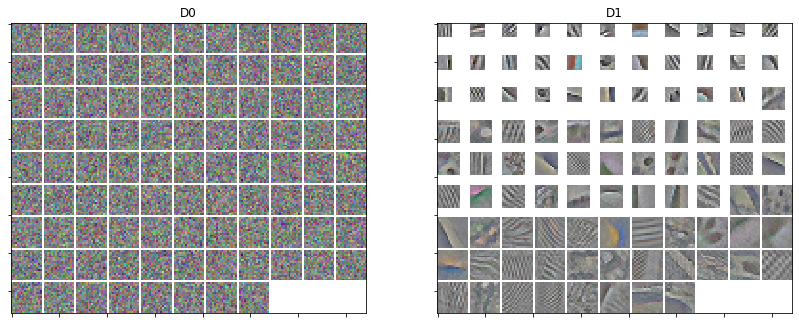

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1, dsz), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, residuals, and automatically adjusted gradient step parameters against the iteration number.

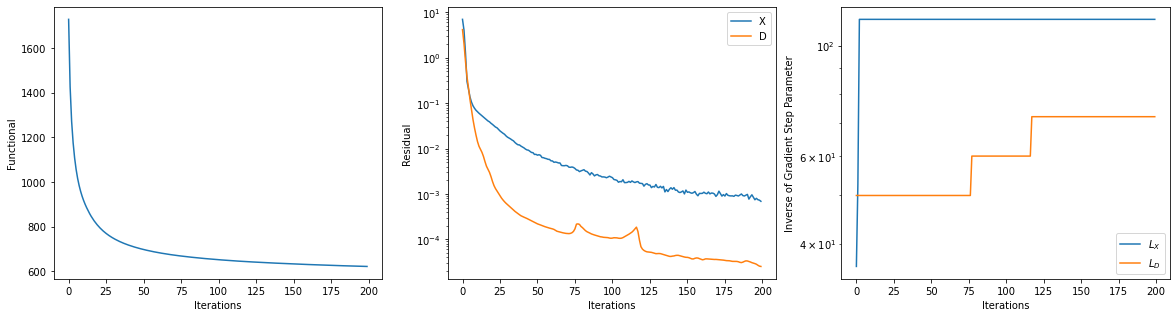

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.X_Rsdl, its.D_Rsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['X', 'D'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.X_L, its.D_L)).T, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', ptyp='semilogy',
          lgnd=['$L_X$', '$L_D$'], fig=fig)
fig.show()